<a href="https://colab.research.google.com/github/Eddav29/MachineLearning_Ganjil_2024/blob/main/Jobsheet_4_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Nama  : Eddo Dava Alfarisi**

#**Kelas : TI-3C**

#**Nim   : 2241720232**

#**Absen : 07**


# **Praktikum 1**
Klasifikasi SVM dengan Data Dummy

In [ ]:
#@title import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

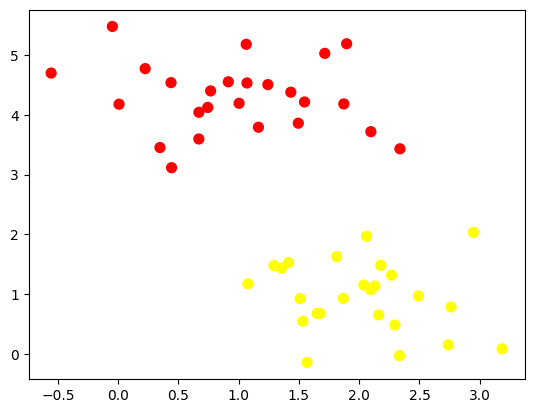

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show();

Kode tersebut bertujuan untuk membuat dan menampilkan dataset dummy untuk keperluan demonstrasi atau eksperimen dalam machine learning, khususnya clustering atau klasifikasi. Dataset dummy yang dibuat berupa dua cluster data yang dihasilkan menggunakan fungsi make_blobs dari library scikit-learn.

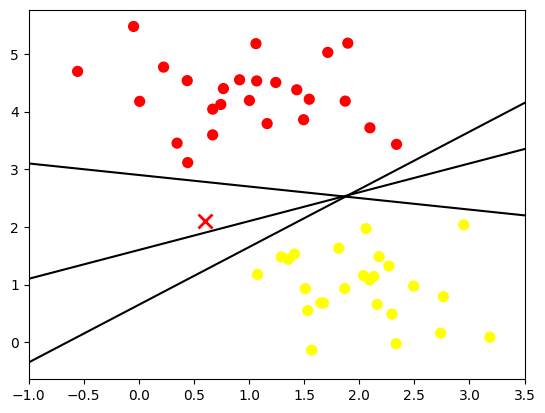

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)#membuat titik x

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

Kode ini bertujuan untuk memvisualisasikan data points dan beberapa garis lurus yang mungkin bisa digunakan untuk memisahkan dua kelas data. Garis-garis ini divisualisasikan sebagai garis hitam yang berbeda-beda kemiringan dan intercept.

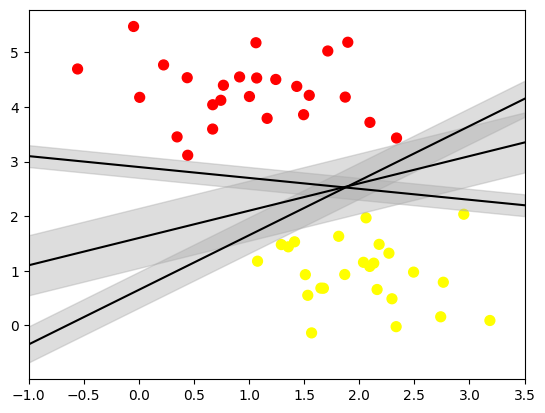

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)
plt.show()

kode diatas adalah kode untuk menambahkan area yang diarsir di sekitar garis untuk merepresentasikan margin dalam konteks klasifikasi, seperti Support Vector Machine (SVM).

In [ ]:
#@title Penerapan Fitting SVM
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

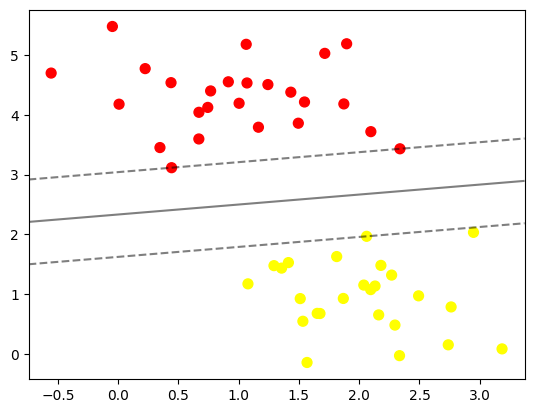

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

kode diatas kuncingnya terletak pada fungsi plot_svc_decision_function digunakan untuk memvisualisasikan hasil fitting data dari model Support Vector Classifier (SVC)

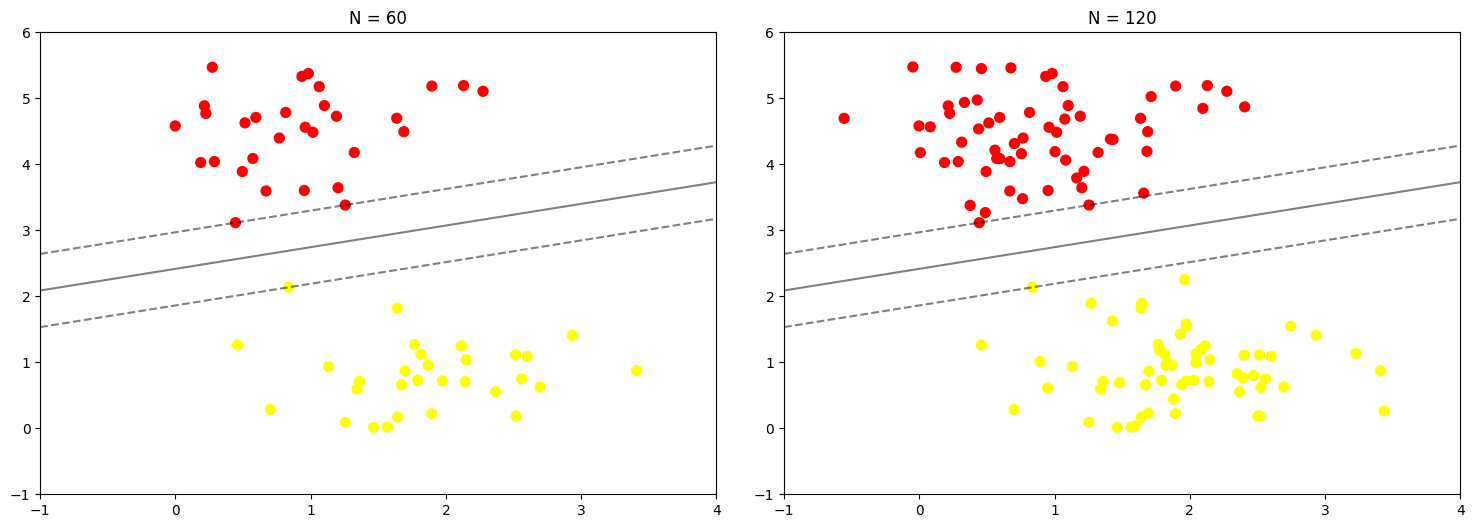

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

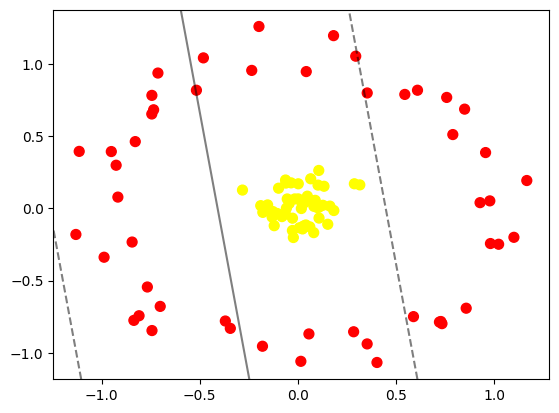

In [ ]:
#@title Data terpisah tapi tidak linear
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

kode diatas menunjukkan keterbatasan SVC dengan kernel linear ketika menghadapi data yang tidak dapat dipisahkan secara linier. Hal ini menjadi dasar untuk menggunakan kernel lain, seperti kernel RBF, yang dapat menangani data non-linear.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 7.31863503e-02,  5.12848051e-02],
       [-7.43445970e-01,  7.81740241e-01],
       [-1.97677370e-01,  1.25857750e+00],
       [ 1.02390701e+00, -2.48706522e-01],
       [-1.88653738e-01,  1.85890490e-02],
       [ 1.58824254e-02, -1.05889365e+00],
       [-4.80876156e-01,  1.04122473e+00],
       [ 9.29247808e-01,  3.92834046e-02],
       [-2.68217703e-02, -6.82648685e-02],
       [-1.19988333e-01, -1.20186130e-01],
       [ 1.83668953e-02, -1.36283446e-03],
       [ 7.29410083e-01, -7.83328064e-01],
       [-1.79766096e-01, -9.54508874e-01],
       [ 2.84901110e-01, -8.54350612e-01],
       [-1.26738088e-01, -2.24057667e-02],
       [-2.34495945e-01,  9.54567009e-01],
       [-7.34609174e-01,  6.82013544e-01],
       [ 9.57390241e-01,  3.85934889e-01],
       [-5.35384638e-02,  6.47265254e-02],
       [ 4.12233101e-02, -1.15164165e-01],
       [ 1.03392074e-01,  1.60723187e-01],
       [-1.11392059e+00,  3.94090126e-01],
       [-2.72241559e-02, -1.53367698e-01],
       [-3.69094094e-01, -7.79957057e-01],
       [ 8.14075385e-02, -1.68272042e-01],
       [ 3.47415491e-02,  4.02697774e-02],
       [-8.28167112e-01,  4.61793136e-01],
       [-1.04577941e-01, -3.56808820e-02],
       [-1.78013681e-01, -2.80678409e-02],
       [-8.35292462e-01, -7.75474414e-01],
       [-8.44187529e-01, -2.33361014e-01],
       [ 3.18269029e-02,  3.92106964e-02],
       [ 9.78985127e-01,  5.15587857e-02],
       [ 2.43844444e-02, -1.42637075e-01],
       [-9.50276607e-01,  3.92953140e-01],
       [-9.77507206e-02,  1.39271592e-01],
       [ 1.16749471e+00,  1.92436273e-01],
       [ 6.10380598e-01,  8.17353773e-01],
       [-6.29881334e-02, -3.96856608e-02],
       [-9.16775923e-01,  7.76874909e-02],
       [-2.81687105e-01,  1.26380392e-01],
       [ 9.96402895e-02,  5.47136742e-03],
       [-8.08805341e-01, -7.43463109e-01],
       [ 2.95517849e-01,  1.05288997e+00],
       [ 1.28191330e-01,  2.10788032e-02],
       [ 2.68312963e-03,  1.69775438e-01],
       [-5.76730651e-02,  9.43620110e-04],
       [-9.25639305e-01,  2.98227165e-01],
       [ 8.58581118e-01, -6.91309478e-01],
       [-6.09805044e-02,  1.74662639e-01],
       [-5.16441215e-01,  8.17311925e-01],
       [ 1.07200471e-01,  2.62147124e-01],
       [ 8.53162157e-03, -1.34671890e-01],
       [ 2.88779823e-02, -1.22975097e-01],
       [-6.21432438e-02,  1.95979230e-01],
       [-4.37938095e-02,  3.36074730e-02],
       [ 9.82224173e-01, -2.43691229e-01],
       [ 3.53753861e-01, -9.38491557e-01],
       [-7.12670421e-01,  9.36303140e-01],
       [-1.30670495e-01, -6.02910877e-02],
       [ 1.08494466e-01, -6.75687846e-02],
       [ 3.16355492e-01,  1.62274644e-01],
       [ 1.52979956e-01, -1.10309131e-01],
       [ 1.08084154e-01,  7.61083084e-03],
       [-2.23549052e-02, -2.02090685e-01],
       [ 8.23012164e-02,  1.39188291e-02],
       [-8.06114234e-02, -5.72131854e-02],
       [ 2.53827112e-03,  6.52878759e-02],
       [ 2.13069398e-02,  3.86000737e-02],
       [-3.40416003e-02,  1.76260627e-01],
       [ 6.14297549e-02, -1.28359778e-01],
       [ 8.50555203e-01,  6.86455246e-01],
       [ 4.89783518e-02,  8.40495907e-02],
       [-1.53456033e-01,  2.37066309e-02],
       [ 7.22280567e-01, -7.87139110e-01],
       [ 1.83947146e-01, -1.51991100e-02],
       [ 7.90365686e-01,  5.10546052e-01],
       [ 5.45718962e-01,  7.88321583e-01],
       [ 3.54060847e-01,  7.98441987e-01],
       [ 1.82505144e-01,  1.19516449e+00],
       [-7.66574194e-01, -5.44513933e-01],
       [ 1.63744412e-01,  1.53436541e-02],
       [-3.43645039e-01, -8.30775221e-01],
       [-7.00973617e-01, -6.78782133e-01],
       [-7.42934296e-01, -8.45924944e-01],
       [ 6.60771473e-02,  2.04470256e-01],
       [ 1.33826484e-01,  1.52768655e-01],
       [ 1.10180764e+00, -2.00583373e-01],
       [ 8.91325702e-02,  5.52413433e-02],
       [-9.87059436e-01, -3.38468020e-01],
       [ 5.89908827e-01, -7.49513736e-01],
       [-7.43934940e-01,  6.52850741e-01

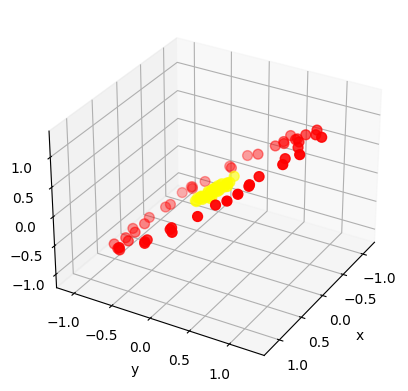

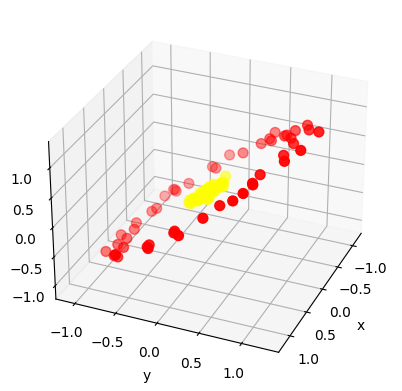

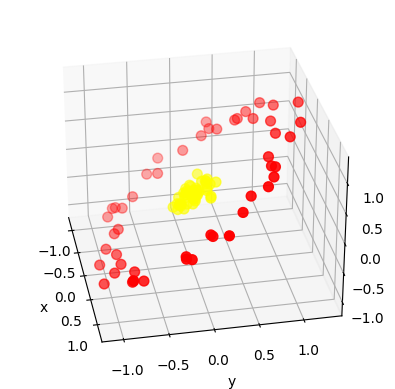

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    r = X[:, 1]
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),X=fixed(X), y=fixed(y))


kode diatas bertujuan untuk memvisualisasikan data dalam bentuk 3D dan memungkinkan pengguna untuk berinteraksi dengan plot dengan mengubah sudut pandang (elevasi dan azimuth).

Membuat plot 3D: Menggunakan mpl_toolkits.mplot3d untuk membuat plot 3D. Data diplot dengan koordinat x, y, dan r (yang diambil dari kolom kedua data).<br>
Mengatur sudut pandang: ax.view_init(elev=elev, azim=azim) digunakan untuk mengatur sudut pandang awal plot.
Interaksi: interact(plot_3D, elev=[...], azim=(...)) <br>memungkinkan kita untuk mengubah sudut elevasi dan azimuth secara interaktif menggunakan slider atau input lainnya. Hal ini memungkinkan pengguna untuk melihat data dari berbagai perspektif.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

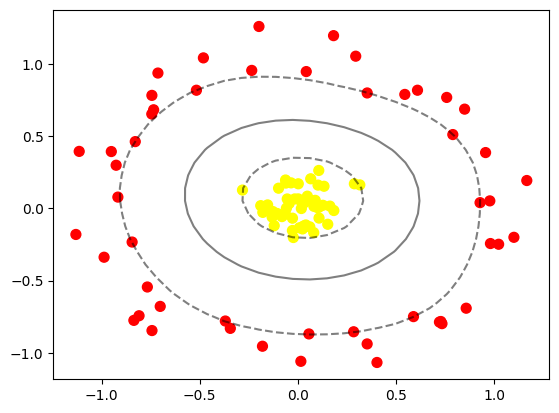

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Memplot data points dengan warna berdasarkan kelas.

plot_svc_decision_function(clf): Memplot decision boundary dan margin dari model SVC yang telah dilatih sebelumnya (clf).

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none'): Menandai support vectors dengan lingkaran besar dan tanpa warna isi. Support vectors adalah data points yang paling dekat dengan decision boundary dan memiliki pengaruh besar dalam menentukan posisi decision boundary.

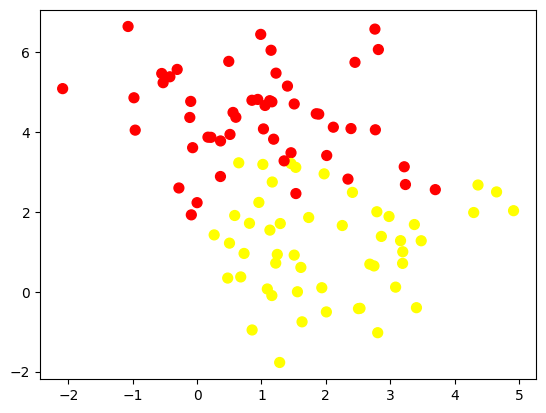

In [ ]:
#@title Data Overlap
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

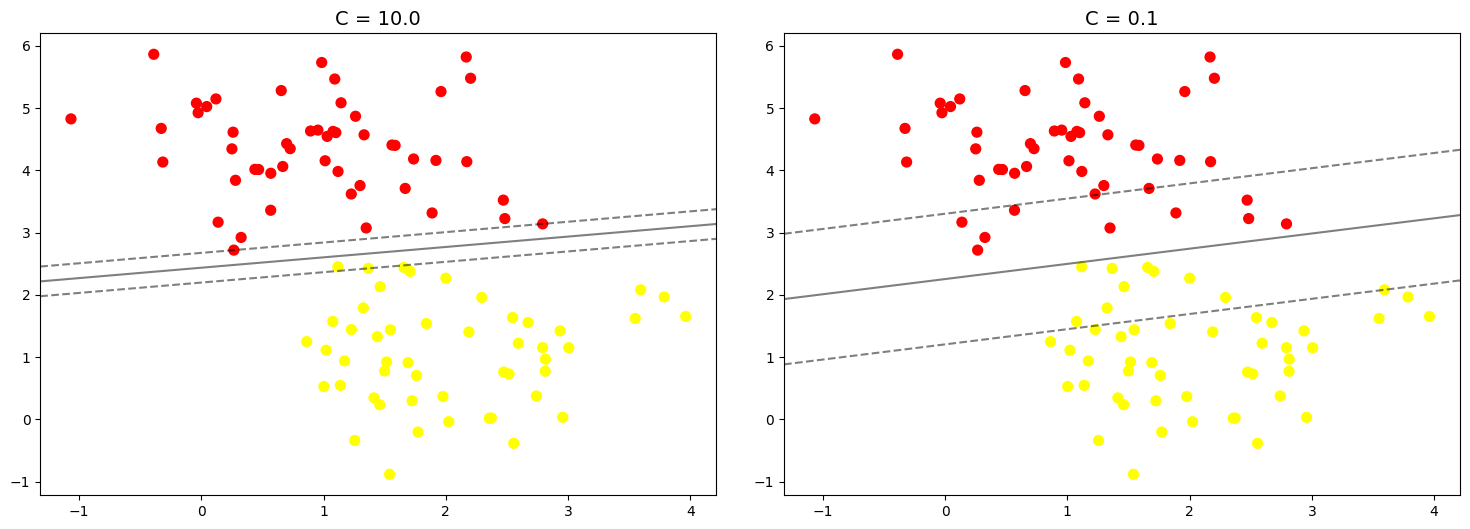

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)


#**Praktikum 2**

In [ ]:
#@title Import data
from google.colab import files

uploaded = files.upload()

Saving lfw_readme.csv to lfw_readme.csv


In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


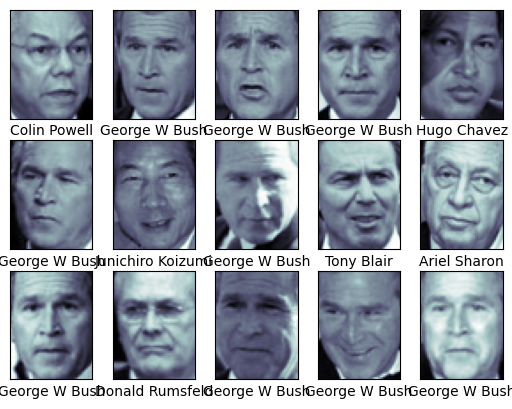

In [ ]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 43s, sys: 28.8 s, total: 2min 12s
Wall time: 1min 20s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Kode ini bertujuan untuk menyederhanakan proses pre-processing dan klasifikasi dengan menggabungkan PCA dan SVC dalam sebuah pipeline. PCA digunakan untuk mengurangi dimensi data, yang dapat meningkatkan kinerja dan efisiensi model. Pipeline ini kemudian digunakan untuk melatih dan mengevaluasi model SVC pada data yang telah direduksi dimensinya.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

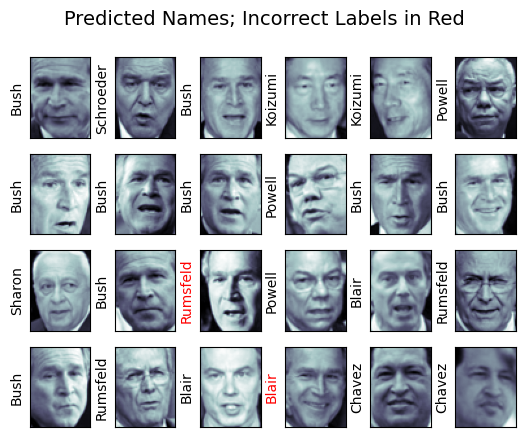

In [ ]:
#@title Prediksi label untuk data testing
model = grid.best_estimator_
yfit = model.predict(Xtest)

# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

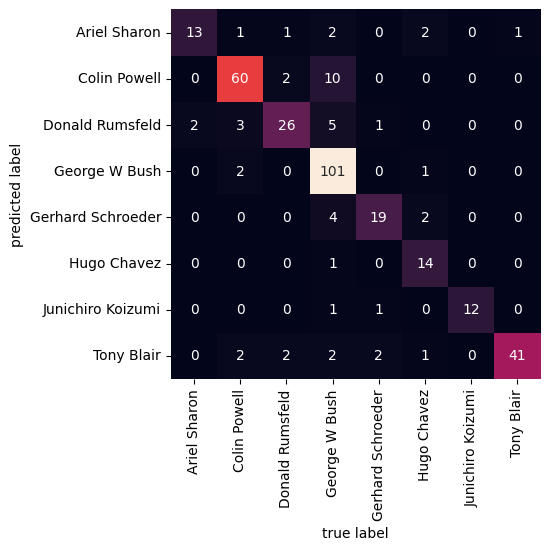

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#**Praktikum 3**
Klasifikasi Naive Bayes dengan Data Dummy

In [ ]:
#@title mendefinisikan data dummy
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 67 190]
 [164  54]
 [112 133]
 [  7  86]
 [ 47 204]
 [ 96 133]
 [224  61]
 [ 60 308]
 [ 82 111]
 [200  46]
 [ 48 170]
 [ 95  87]
 [ 28 221]
 [151  23]
 [ 57 177]
 [ 26 301]
 [ 90  80]
 [177  51]
 [ 18 181]
 [ 74 204]
 [299 101]
 [112  34]
 [ 43  22]
 [162  47]
 [ 67 128]
 [247  25]
 [196  19]
 [ 45 146]
 [ 68 127]
 [261  36]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1]


In [ ]:
#@title Membuat data Frame
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,67,190,0
1,164,54,0
2,112,133,0
3,7,86,0
4,47,204,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,67,190,Kelas B
1,164,54,Kelas B
2,112,133,Kelas B
3,7,86,Kelas B
4,47,204,Kelas B


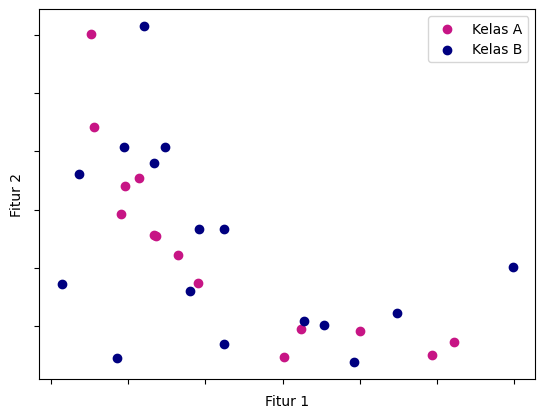

In [ ]:
#@title Visualisasi Data
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
#@title Klasifikasi Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.2222222222222222


In [ ]:
#@title Klaifikasi Gausian Naive Bayes
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.2222222222222222


#**Praktikum 4**


In [ ]:
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#@title Pra pengolahan Data
#drop kolom
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#ubah nama kolom
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#@title inspeksi data
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
#@title Encode label
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#@title memisahkan fitur
X = df['SMS'].values
y = df['Labels'].values

In [ ]:
##title Ekstraksi fitur
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)
# Menggunakan get_feature_names_out() untuk mendapatkan fitur
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')


7727
Dimensi data: (4457, 7727)


In [ ]:
#@title Training dan evaluasi model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')


Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# **Praktikum 5**

In [1]:
#@title import library
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Image directories
train_dir = 'content/drive/MyDrive/Machine_Learning/data/images/training/'
test_dir = 'content/drive/MyDrive/Machine_Learning/data/images/test/'

In [31]:
from pathlib import Path

p = Path(train_dir)
if p.exists():
    print("Direktori ditemukan.")
else:
    print("Direktori tidak ditemukan.")


Direktori tidak ditemukan.


karena kemarin error jadi saya pakai cara sendiri

In [32]:
#@title upload manual
from google.colab import files

uploaded = files.upload()

Saving images.zip to images.zip


In [33]:
#@title ekstrak secara program
import zipfile
import os

# Extract the uploaded zip file
zip_path = 'images.zip'
extract_dir = 'extracted_images/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the files in the extracted directory
extracted_files = os.listdir(extract_dir)
extracted_files


['images', '__MACOSX']

In [37]:
train_dir = '/content/extracted_images/images/training/'
test_dir = '/content/extracted_images/images/test/'

In [38]:
#@title Load data set
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [39]:
# Memanggil fungsi untuk memuat dataset
train_img = load_dataset(train_dir)

# Check the first data
# It should be a tuple consisting of arrays of image and image labels
if len(train_img) > 0:
    print(train_img[0])  # Output tuple of first image and its label
else:
    print("Data tidak ditemukan.")

(array([[[ 90, 135, 192],
        [ 69, 114, 171],
        [ 63, 108, 165],
        ...,
        [ 64, 101, 145],
        [ 64, 101, 145],
        [ 63, 100, 144]],

       [[ 89, 134, 191],
        [ 68, 113, 170],
        [ 63, 108, 165],
        ...,
        [ 66, 103, 147],
        [ 66, 103, 147],
        [ 66, 103, 147]],

       [[ 88, 133, 190],
        [ 68, 113, 170],
        [ 63, 108, 165],
        ...,
        [ 67, 104, 148],
        [ 67, 104, 148],
        [ 68, 105, 149]],

       ...,

       [[ 61,  35,  12],
        [ 58,  34,  10],
        [ 55,  30,   8],
        ...,
        [ 18,  11,   1],
        [ 15,  11,   2],
        [ 17,  13,   4]],

       [[ 57,  35,  14],
        [ 58,  36,  15],
        [ 54,  32,  11],
        ...,
        [ 20,  13,   3],
        [ 17,  13,   4],
        [ 22,  18,   9]],

       [[ 55,  34,  15],
        [ 55,  37,  17],
        [ 52,  34,  14],
        ...,
        [ 19,  12,   2],
        [ 18,  14,   5],
        [ 26,  22,  13]

In [40]:
#@title pick random
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 103
(469, 640, 3)


In [41]:
#@title Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: night


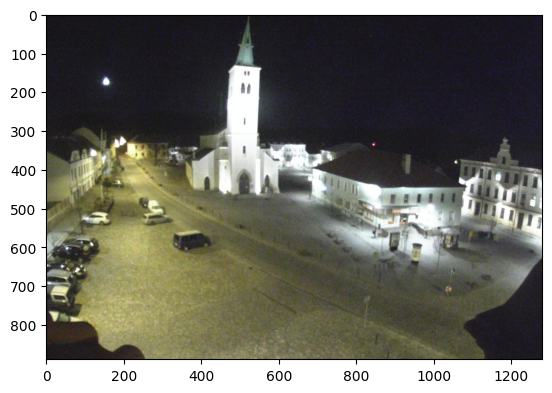

In [42]:
random_img_viz(train_img)

In [43]:
#@title Pre Processing data
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [44]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [45]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [46]:
train_std_img_list = preprocess(train_img)

In [47]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 6
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


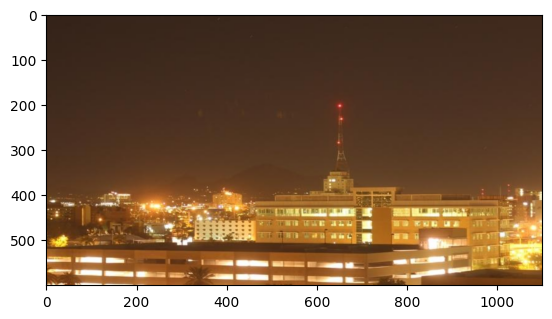

In [48]:
random_img_viz(train_std_img_list)

In [49]:
#@title ekstraksi fitur
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 0
Avg Brighness: 159.2109


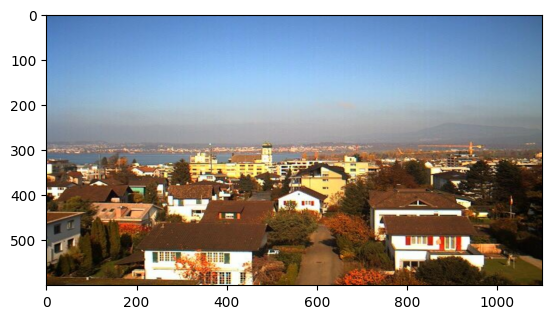

In [50]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [51]:
#@title klasifikasi menggunakan metode treeshold
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 62
Actual label: 1
Predicted label: 0


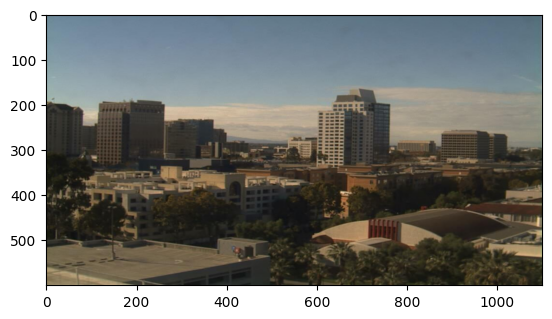

In [52]:
#@title Pengecekkan prdiksi secara acak
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [53]:
#@title Evaluasi secara manual
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [54]:
#@title Evaluate on train data sampai dengan batas 120 data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [55]:
#@title Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [56]:
#@title Alternatif ekstraksi fitur
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [57]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,159.210865,1.0
1,107.358529,1.0
2,138.835189,1.0
3,187.700786,1.0
4,110.299155,1.0


In [58]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,149.179342,1.0
1,188.119652,1.0
2,123.281580,1.0
3,132.243377,1.0
4,126.723102,1.0


In [59]:
#@title ALternatif model yaitu menggunakan svm
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [60]:
#@title evaluasi
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
